In [2]:
!pip install node2vec

  Created wheel for node2vec: filename=node2vec-0.4.3-py3-none-any.whl size=5980 sha256=69ddb4c64d2b98baa109a464b100822a24b67f6b6eb159fefe1eadeb9aa37ec9
  Stored in directory: /root/.cache/pip/wheels/07/62/78/5202cb8c03cbf1593b48a8a442fca8ceec2a8c80e22318bae9
Successfully built node2vec


In [10]:
import networkx as nx
from node2vec import Node2Vec

EMBEDDING_FILENAME="em_filename.txt"
EMBEDDING_MODEL_FILENAME="em_model"
EDGES_EMBEDDING_FILENAME="edg_em_file"

# Create a graph z jankiem, i  ogladaj skoki narciarskie
graph = nx.fast_gnp_random_graph(n=100, p=0.5)

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=64, walk_length=30, num_walks=200, workers=4)  # Use temp_folder for big graphs

# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `dimensions` and `workers` are automatically passed (from the Node2Vec constructor)

# Look for most similar nodes
model.wv.most_similar('2')  # Output node names are always strings

# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

# Embed edges using Hadamard method
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

# Look for embeddings on the fly - here we pass normal tuples
edges_embs[('1', '2')]
''' OUTPUT
array([ 5.75068220e-03, -1.10937878e-02,  3.76693785e-01,  2.69105062e-02,
       ... ... ....
       ..................................................................],
      dtype=float32)
'''

# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv = edges_embs.as_keyed_vectors()

# Look for most similar edges - this time tuples must be sorted and as str
edges_kv.most_similar(str(('1', '2')))

# Save embeddings for later use
edges_kv.save_word2vec_format(EDGES_EMBEDDING_FILENAME)

Computing transition probabilities:   0%|          | 0/100 [00:00<?, ?it/s]

Generating edge features: 100%|██████████| 5050/5050.0 [00:00<00:00, 183702.24it/s]


In [4]:
import sys
print(sys.version)

3.7.13 (default, Mar 16 2022, 17:37:17) 
[GCC 7.5.0]


In [11]:
!cat em_filename.txt


100 64
22 -0.102730356 -0.12937033 0.08355064 0.07677978 0.08027005 -0.16667967 0.11634218 0.01770716 -0.029244144 0.050287824 -0.008802936 -0.09213708 0.15703395 -0.112429775 0.024530005 0.2605863 -0.050718915 -0.017126568 -0.072661996 -0.070198104 0.14606202 -0.10025053 0.18724585 0.15274306 0.0078227185 0.026425797 0.02772577 0.112666085 -0.07787144 0.15606402 0.111429684 0.09063017 0.10366871 -0.03169083 -0.08647902 0.05596692 0.1473801 0.25775695 0.085541554 -0.15931854 0.10887163 -0.047601394 0.040878057 -0.1703767 -0.12682958 -0.019550877 -0.0055766776 -0.12223785 -0.04664596 -0.22550227 0.17969307 -0.007693317 -0.1284083 0.021796433 -0.084026866 0.004074728 0.12173404 0.0042147394 0.042738054 0.053058658 0.07254722 -0.177427 -0.011731834 -0.089933164
51 -0.08066895 0.06447847 -0.027661718 -0.08108981 0.0027386267 0.07210375 0.008176104 -0.055937767 -0.10781719 0.08528106 -0.011642636 -0.06252605 0.19010063 -0.12559633 0.038291447 0.12381124 -0.12106735 -0.07418307 -0.015976058 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: ConversionWarning: Some errors were detected !
    Line #1 (got 2 columns instead of 64)
  """


[100.  22.  51.  55.  76.  81.  36.  32.  35.  70.  71.   3.  54.  49.
  28.  30.  10.  33.   7.  16.  75.  64.  21.   4.  43.  39.  40.  95.
  92.  18.  94.  13.  41.   0.  11.  69.  74.  93.  45.  65.  80.  87.
  73.  26.  19.  99.  59.  15.  84.  83.  96.  82.   5.  48.  38.  50.
   1.  31.  44.  78.  67.  23.  63.  58.  91.  61.  68.  42.  66.   9.
  47.  24.  34.  79.   8.  85.  98.  46.   6.  97.  56.  37.   2.  90.
  77.  20.  53.  12.  17.  27.  72.  88.  52.  60.  57.  25.  29.  89.
  14.  62.  86.]


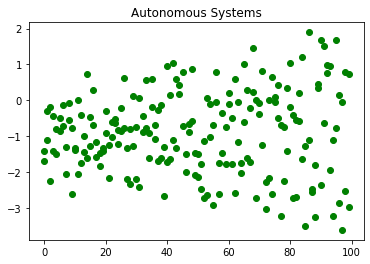

In [37]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

File_data = np.genfromtxt("em_filename.txt", dtype=float,invalid_raise = False,usecols=np.arange(1, 65))


as_labels = np.genfromtxt("em_filename.txt", dtype=float,invalid_raise = False,usecols=np.arange(0, 1))
print(as_labels)

embedding = TSNE(n_components=2,learning_rate='auto',init='random').fit_transform(File_data)

plt.plot(embedding,'go')
plt.xlabel(' x co-ordinates')
plt.ylabel(' y co-ordinates')
plt.title('Autonomous Systems')
plt.show()